# What is the raw layers training ?
raw layers training its a condition to training layers without layers wrapper like Sequential or not bring layers at class Model when training run.

In [ ]:
!pip install littlelearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 2.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv("sentiment_analysis.csv")

In [ ]:
import numpy as np

In [ ]:
df.dropna(how='all',inplace=True)

In [ ]:
df

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


In [ ]:
x_data = df.text.to_list()
y_data = df.sentiment.to_list()

In [ ]:
y_train = [1 if x == 'positive' else 0 for x in y_data]

In [ ]:
import littlelearn as ll

In [ ]:
tokenizer = ll.preprocessing.Tokenizer()
tokenizer.fit_on_texts(x_data)

In [ ]:
x_train = tokenizer.texts_to_sequences(x_data,padding_len=50)

In [ ]:
y_train = np.array(y_train).reshape(-1,1)

## so now we have import all layers that we needed.
in here i want try do sentiment analysis with GRU layers

did everyone know about GRU(Gated Recurrent Units) layers ? i'll explained by short sentence this is :
" a layers with gate information mechanism like lstm, but in GRU we not do with cell gate and hidding_state gate. GRU will do reset all information when not relavan for hidden_state and its just reset non relavan hidden_state logits"  

In [ ]:
from littlelearn import DeepLearning  as dl

In [ ]:
embedding = dl.layers.Embedding(tokenizer.len_vocab + 1,output_dim=128)
Gru_layers = dl.layers.GRU(64,return_sequence=True)
Normal_layers = dl.layers.LayerNormalization()
pooling_layers = dl.layers.GlobalAveragePooling1D()
out_layers = dl.layers.Dense(1)

In [ ]:
loss_fn = dl.loss.BinaryCrossentropy(from_logits=True)
optimizers_fn = dl.optimizers.Adam(learning_rate=0.01)

In [ ]:
for epoch in range(50) :
  x1 = embedding(x_train)
  x2 = Gru_layers(x1)
  x3 = Normal_layers(x2)
  x4 = pooling_layers(x3)
  outputs = out_layers(x4)
  loss = loss_fn(y_train,outputs)
  loss.AutoClipGradient()
  loss.backwardpass()
  weight = []
  for layers in [embedding,Gru_layers,Normal_layers,pooling_layers,out_layers] :
    w = layers.get_weight()
    if w is not None :
      for wu in w :
        weight.append(wu)

  optimizers_fn.apply_weight(weight)
  optimizers_fn.forward_in_weight()
  loss.kill_grad()

  print(f"Epoch : {epoch + 1} || loss : {loss.get_tensor():.6f}")


Epoch : 1 || loss : 0.626492
Epoch : 2 || loss : 0.626341
Epoch : 3 || loss : 0.626186
Epoch : 4 || loss : 0.626025
Epoch : 5 || loss : 0.625856
Epoch : 6 || loss : 0.625682
Epoch : 7 || loss : 0.625505
Epoch : 8 || loss : 0.625325
Epoch : 9 || loss : 0.625143
Epoch : 10 || loss : 0.624957
Epoch : 11 || loss : 0.624764
Epoch : 12 || loss : 0.624565
Epoch : 13 || loss : 0.624361
Epoch : 14 || loss : 0.624152
Epoch : 15 || loss : 0.623939
Epoch : 16 || loss : 0.623722
Epoch : 17 || loss : 0.623498
Epoch : 18 || loss : 0.623268
Epoch : 19 || loss : 0.623032
Epoch : 20 || loss : 0.622789
Epoch : 21 || loss : 0.622540
🧊 Gradient vanishing detected! Norm = 0.00000245 → Boost ×10000.00
🧊 Gradient vanishing detected! Norm = 0.00000339 → Boost ×10000.00
Epoch : 22 || loss : 0.622285
Epoch : 23 || loss : 0.602078
Epoch : 24 || loss : 0.577801
Epoch : 25 || loss : 0.552175
Epoch : 26 || loss : 0.526085
Epoch : 27 || loss : 0.499216
Epoch : 28 || loss : 0.472779
Epoch : 29 || loss : 0.449693
Epoch

## lets wrap all trained layers to class model, actually you can use layers to layers for inference. but for make all simple we have make class model.

In [ ]:
class SentimentAnalyster :
  def __init__ (self) :
    self.__tokenizers = tokenizer
    self.embedding = embedding
    self.gru = Gru_layers
    self.normal = Normal_layers
    self.pooling = pooling_layers
    self.Fc = out_layers

  def get_weight(self) :
    weight = []
    for layers in [self.embedding,self.gru,self.normal,self.pooling,self.Fc] :
      w = layers.get_weight()
      if w is not None :
        for wu in w :
          weight.append(wu)
    return weight

  def predict(self,x) :
    x = self.__tokenizers.texts_to_sequences(x,padding_len=50)
    x = self.embedding(x)
    x = self.gru(x)
    x = self.normal(x)
    x = self.pooling(x)
    x = self.Fc(x)
    return dl.activations.sigmoid(x)

In [ ]:
model = SentimentAnalyster()

In [ ]:
y = model.predict(x_data)

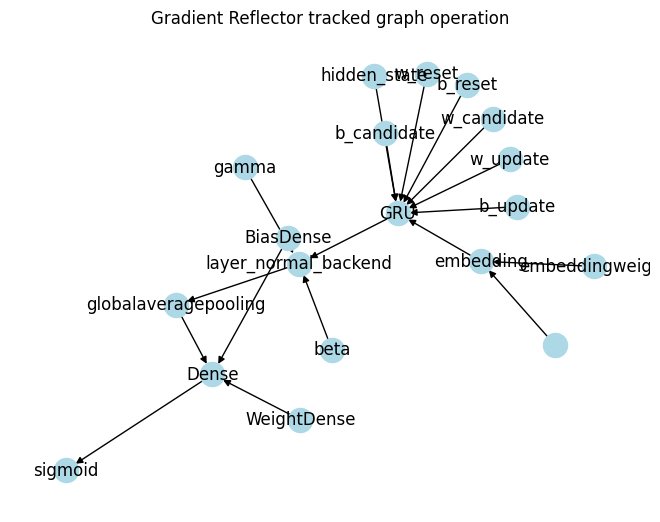

In [ ]:
y.plot_trace_operation()

In [ ]:
optimizer_fn = dl.optimizers.Adam()
loss_fn = dl.loss.BinaryCrossentropy()

In [ ]:
x_data[0]

'What a great day!!! Looks like dream.'

In [ ]:
for i in range(20) :
  outputs = model.predict(x_data)
  loss = loss_fn(y_train,outputs)
  loss.AutoClipGradient()
  loss.backwardpass()
  optimizer_fn.apply_weight(model.get_weight())
  optimizer_fn.forward_in_weight()
  loss.kill_grad()
  print(f"Epoch {i + 1}  loss : {loss.get_tensor():.6f}")

Epoch 1  loss : 0.304622
Epoch 2  loss : 0.297620
Epoch 3  loss : 0.294242
Epoch 4  loss : 0.293758
Epoch 5  loss : 0.294900
Epoch 6  loss : 0.296149
Epoch 7  loss : 0.296349
Epoch 8  loss : 0.295083
Epoch 9  loss : 0.292522
Epoch 10  loss : 0.289103
Epoch 11  loss : 0.285296
Epoch 12  loss : 0.281488
Epoch 13  loss : 0.277936
Epoch 14  loss : 0.274763
Epoch 15  loss : 0.271978
Epoch 16  loss : 0.269515
Epoch 17  loss : 0.267278
Epoch 18  loss : 0.265179
Epoch 19  loss : 0.263164
Epoch 20  loss : 0.261215


In [ ]:
model.predict(x_data)

(Tensor with shape : ((499, 1)) : 
  [[0.70602816]
 [0.47977072]
 [0.2683756 ]
 [0.11700552]
 [0.08406352]
 [0.24540211]
 [0.692556  ]
 [0.25223586]
 [0.26042143]
 [0.68833596]
 [0.22264826]
 [0.7065075 ]
 [0.08779966]
 [0.07673927]
 [0.20501897]
 [0.25234354]
 [0.12462293]
 [0.25270185]
 [0.8214246 ]
 [0.59982604]
 [0.09475393]
 [0.7233482 ]
 [0.13043752]
 [0.13279124]
 [0.3895594 ]
 [0.7166117 ]
 [0.07850177]
 [0.13963985]
 [0.14396027]
 [0.09928171]
 [0.745826  ]
 [0.75179774]
 [0.06185092]
 [0.73408985]
 [0.14475717]
 [0.5541688 ]
 [0.06415577]
 [0.21785265]
 [0.24854682]
 [0.4467031 ]
 [0.03447673]
 [0.16373327]
 [0.22502384]
 [0.19412743]
 [0.5562395 ]
 [0.09491652]
 [0.26479992]
 [0.355026  ]
 [0.45427597]
 [0.13089724]
 [0.2010345 ]
 [0.30355644]
 [0.15454866]
 [0.07116213]
 [0.30333915]
 [0.1464675 ]
 [0.08601923]
 [0.84024817]
 [0.15644693]
 [0.6255249 ]
 [0.80155575]
 [0.6676525 ]
 [0.3185504 ]
 [0.86116207]
 [0.5631451 ]
 [0.32149717]
 [0.7060282 ]
 [0.4797708 ]
 [0.2683757

In [ ]:
y_train

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    